# 1. Crear la señal normal

12000
12000


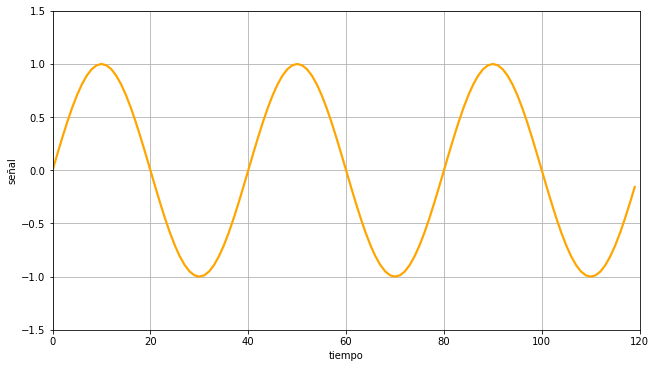

12000
12000
12000
12000
12000
12000
12000
12000


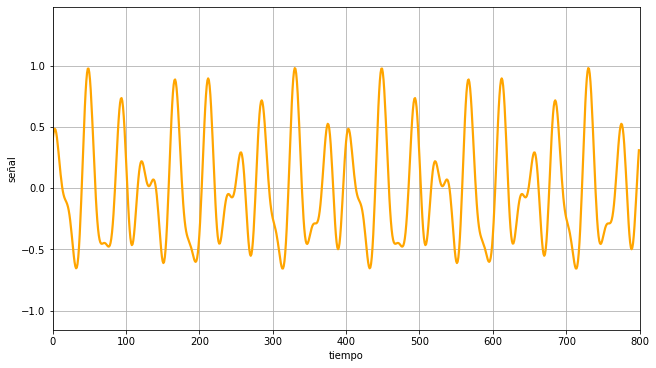

In [24]:
import matplotlib.pyplot as plt
import numpy as np


def plot_signal(signal, time):
    fig, axes = plt.subplots(constrained_layout=True, figsize=(9, 5))
    axes.plot(time, signal, '-', color='orange', lw=2.2)
    axes.set_ylim(np.amin(signal) - 0.5, np.amax(signal) + 0.5)
    axes.set_xlim(0, len(signal))
    #axes.set_title('Señal Original')
    axes.set_xlabel('tiempo')
    axes.set_ylabel('señal')
    axes.grid(True)
    plt.show()


def create_signal(factor, ventana, densidad_de_puntos, numero_de_ventanas, fase_inicial, amplitud):
    limite = (ventana * numero_de_ventanas)
    time = np.arange(start=0, stop=limite, step=(1/densidad_de_puntos))
    frecuencia = (factor/ventana)
    signal = amplitud * np.sin((2 * np.pi * frecuencia * time) + fase_inicial) 

    print(signal.size)
    print(time.size)
    return signal, time, limite


def create_simple_signal():
    señal_simple, tiempo_simple, limite = create_signal(1, 40, 1, 300, 0, 1)
    plot_signal(señal_simple[0:120], tiempo_simple[0:120])
    return señal_simple, tiempo_simple, limite
    

def create_combined_signal():
    señal_1, tiempo, limite_eje_temporal = create_signal(0.5, 40, 1, 300, 1  , 1  )
    señal_2, _, _     = create_signal(1.2, 40, 1, 300, 2  , 0.5)
    señal_3, _, _     = create_signal(1.8, 40, 1, 300, 0.5, 2)
    señal_4, _, _     = create_signal(1  , 40, 1, 300, 0  , 0.5)
    return np.add(np.multiply(señal_1, señal_2, señal_3), señal_4), tiempo, limite_eje_temporal



create_simple_signal()


# señal, tiempo, limite_eje_temporal = create_simple_signal()
señal, tiempo, limite_eje_temporal = create_combined_signal()
plot_signal(señal[0:800], tiempo[0:800])






# 2. Insertar las anomalías

In [2]:

def obtener_indices_de_anomalias(porcentaje_de_anomalias, cantidad_de_puntos, limite_eje_temporal):
    cantidad_de_anomalias = int(np.floor(limite_eje_temporal * (porcentaje_de_anomalias/100)))
    return np.random.choice(cantidad_de_puntos, cantidad_de_anomalias, replace=False)


#PORCENTAJE = 1.1
PORCENTAJE = 2
indices = obtener_indices_de_anomalias(PORCENTAJE, tiempo.size, limite_eje_temporal)
print(indices.size)
print(indices)



240
[ 4370  9542  1740  6201  4807   957 11048  1947  8592 11073  3963 11338
  8640  7160 10783  2919  6401  6725   756  6861  9104  3549  1694   314
   119  3379  1477  6418   173  4621  2010   984  2426  5618  7166  1115
  9550  7531   301 11775  7488  7750 11731  6776   693  9636  1961 11502
  9319  5173  7179  4418  2879 11885  6919  7983  7199  5948  4523  6430
  7572 11894 11277  7172  3627 10319  4114  2600  4962 11475  2876   311
  2475  5971  5506  7049  8136  7028 10643  1931  2100  6602 10716  9358
   920   718  8168  8463  8801 11288  6769 10077 10076  7696  7961  8415
  4998  1606  4402  5886  1468  2273  4163  4490   933   766  8754  7233
  1572 11131  6471 11947  6000  7106  3723  6095  8453  4019  2774 11417
 10911  1585  7253  7639  1855 11514  1337  9132  8850 10866  3811  6026
  9704  2772  5242  2334  2755  7813  1133  9652 10901   636  7403  1448
  4034  9217  6256   572  5524 10605  9942  2975   485  9296  1907  9988
 11566  3103  1227   202  5094  4053  7905  522

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


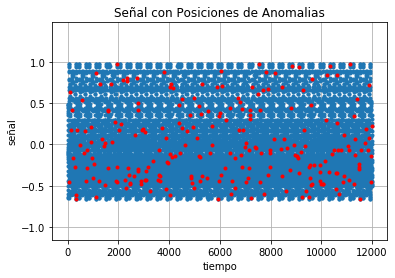

In [3]:

fig, axes = plt.subplots()
axes.plot(tiempo, señal, '.')
axes.plot(np.take(tiempo, indices), np.take(señal, indices), 'r.')
axes.set_ylim(np.amin(señal) - 0.5, np.amax(señal) + 0.5)
axes.set_title('Señal con Posiciones de Anomalias')
axes.set_xlabel('tiempo')
axes.set_ylabel('señal')
axes.grid(True)
fig.show()




In [4]:


def añade_anomalias(señal, tiempo, posiciones):
    for i in posiciones:
        termino = np.cos(tiempo[i])
        if np.random.ranf() >= 0.5:
            señal[i] = señal[i] + (termino if np.random.ranf() > 0.4 else termino/np.random.randint(2,4))
        else:
            señal[i] = señal[i] - (termino if np.random.ranf() > 0.4 else termino/np.random.randint(4,7))
    return señal


señal_anomala = añade_anomalias(np.copy(señal), tiempo, indices)


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


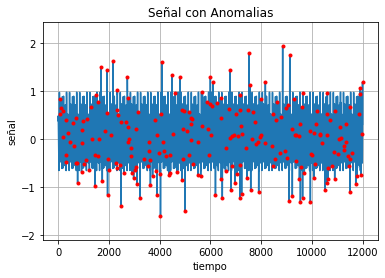

In [5]:
fig, axes = plt.subplots()
axes.plot(tiempo, señal_anomala, '-')
axes.plot(np.take(tiempo, indices), np.take(señal_anomala, indices), 'r.')
axes.set_ylim(np.amin(señal_anomala) - 0.5, np.amax(señal_anomala) + 0.5)
axes.set_title('Señal con Anomalias')
axes.set_xlabel('tiempo')
axes.set_ylabel('señal')
axes.grid(True)
fig.show()


12000
Hay 240 indices con anomalías y 240 etiquetas igualadas a 1


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


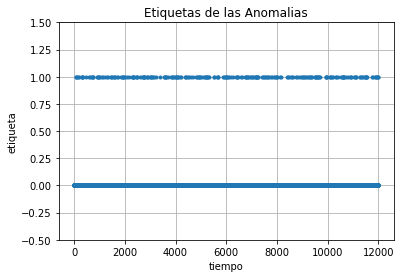

In [6]:

etiquetas = np.zeros(señal_anomala.size, dtype=int)
etiquetas[indices] = 1

print(etiquetas.size)
print('Hay {} indices con anomalías y {} etiquetas igualadas a 1'.format(indices.size, int(np.sum(etiquetas))))

fig, axes = plt.subplots()
axes.plot(tiempo, etiquetas, '.')
axes.set_ylim(-0.5, 1.5)
axes.set_title('Etiquetas de las Anomalias')
axes.set_xlabel('tiempo')
axes.set_ylabel('etiqueta')
axes.grid(True)
fig.show()

# 3. Guardar la señal en un fichero

In [7]:

import pandas as pd 
  
data = {'data': señal_anomala, 'label':etiquetas} 
df = pd.DataFrame(data) 
  

df.to_csv('señal_senoidal_combinada_anomala_{}porciento_40.csv'.format(PORCENTAJE), index=False)

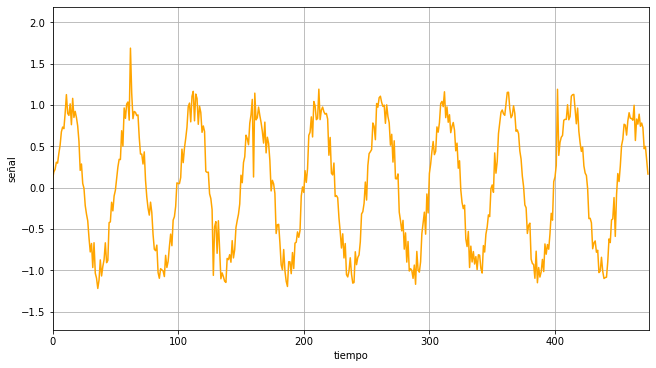

In [32]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

start = 0
stop = start + 475

dataFrame = pandas.read_csv('señal_senoidal_anomala_2porciento_noisy0.2.csv')
tiempo = np.arange(start=start, stop=stop, step=1)
signal = dataFrame['data'][start:stop]


fig, axes = plt.subplots(constrained_layout=True, figsize=(9, 5))
axes.plot(signal, '-', color='orange')
axes.set_xlim(start, len(signal))
axes.set_ylim(np.amin(signal) - 0.5, np.amax(signal) + 0.5)
axes.set_xlabel('tiempo')
axes.set_ylabel('señal')
axes.grid(True)
plt.show()



